# Distribution of minimum number of SECs for random instances

In this notebook, we will analyze the distribution of the minimum number of SECs for random instances. 
We analyzed three types of random instances:
- Random instances where the costs are drawn at random from a uniform distribution (non metric)
- Random instances where the costs are drawn at random from an exponential distribution (non metric)
- Random instances in the euclidean plane where the points are drawn at random from a uniform distribution (metric)
The behavior of the minimum number of SECs is quite different for these three types of random instances and will be analyzed using boxplots.

First we import the necessary libraries as well as the function for generating random instances.

In [2]:
from utils import sample
from ialg import ialg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.cbook as cbook

## Random instances where the costs are drawn at random from a uniform distribution

In [2]:
n_min = 10
n_max = 100 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100 # This is the value we used in the paper

In [3]:
out = {}
seed = 0
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "uniform")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G) # Here, we do not use verbosity, as the line printed will be too many
        out[n].append((S_family, S_num, partitions, max_comp, runtime, bb_nodes))

  0%|          | 0/10 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18


100%|██████████| 10/10 [16:04<00:00, 96.47s/it] 


### Minimum number of subtour elimination constraints to prove optimality.

First, we analyze the empirical distribution of the minimum number of SECs needed to prove optimality. We do it trough boxplots

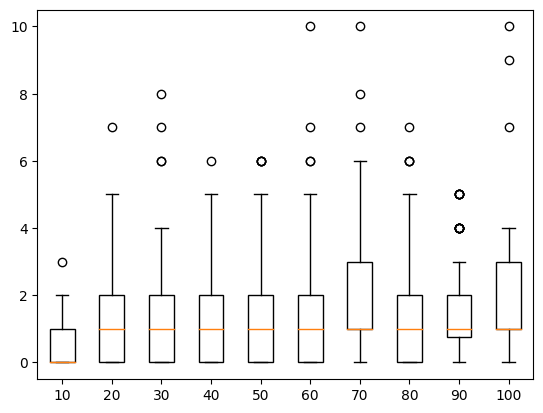

In [4]:
labels = [str(n) for n in range(n_min, n_max + 1, step)]

data = np.zeros((n_samples_for_each_n, len(labels)))

for i, n in enumerate(out.keys()):
    data[:, i] = sorted([y[1] for y in out[n]])

F = open("./output/boxplot_uniform_data.csv", "w+")
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        F.write(f"{data[i, j]},")
    F.write("\n")
F.close()

    
# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels)

    

# draw boxplots
fig, ax = plt.subplots()
bplots = ax.bxp(stats, patch_artist=True, showfliers=True)

# change colors
colors = len(stats) * ['white']
for patch, clr in zip(bplots["boxes"], colors):
    patch.set_facecolor(clr)

plt.show()

### Trend of $c$ vs $c'$

In this part, we want to assess the impact of the flag `minimalize` when setting to either `True` or `False`. 

The previous part of the expriments was done using `minimalize=True`, so the only part left to analyze is `minimalize=False`.

In [5]:
n_min = 10
n_max = 30 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100

In [6]:
seed = 0
out_minimalize_False = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out_minimalize_False[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "uniform")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G, minimalize=False)
        out_minimalize_False[n].append((S_family, S_num, partitions, max_comp, runtime))

100%|██████████| 3/3 [00:06<00:00,  2.25s/it]


Note that, globally, the procedure take more less time when minimalize is equal to `False`

We report the distribution of $c'$ and $c$ as two side-by-side boxplots

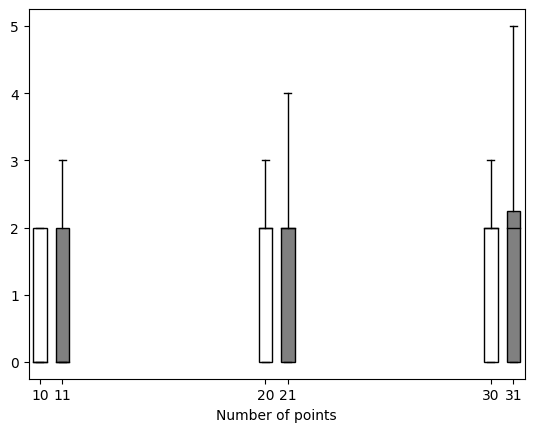

In [7]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = [y[3] for y in out[n]]
    x_minimalize_False = [y[3] for y in out_minimalize_False[n]]
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False)
    bp_minimalize_False = plt.boxplot(x_minimalize_False, vert=True, patch_artist=True, positions=[n + 1], widths=0.6, showfliers=False)
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=1)
    for patch in bp_minimalize_False['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('black')
        for median in bp_minimalize_False['medians']:
            median.set(color='black', linewidth=1)
plt.xlabel('Number of points')
plt.show()

## Random instances where the costs are drawn at random from an exponential distribution

In [8]:
n_min = 10
n_max = 100 #You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100

In [9]:
out = {}
seed = 0
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "exponential")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G) # Here, we do not use verbosity, as the line printed will be too many
        out[n].append((S_family, S_num, partitions, max_comp, runtime, bb_nodes))

100%|██████████| 10/10 [16:22<00:00, 98.29s/it] 


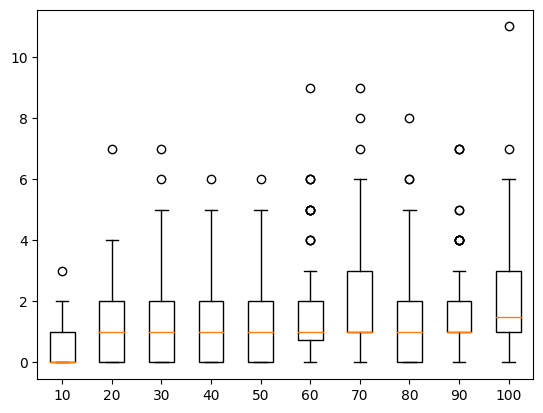

In [10]:
labels = [str(n) for n in range(n_min, n_max + 1, step)]

data = np.zeros((n_samples_for_each_n, len(labels)))

for i, n in enumerate(out.keys()):
    data[:, i] = sorted([y[1] for y in out[n]])

F = open("./output/boxplot_exponential_data.csv", "w+")
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        F.write(f"{data[i, j]},")
    F.write("\n")
F.close()

    
# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels)

    

# draw boxplots
fig, ax = plt.subplots()
bplots = ax.bxp(stats, patch_artist=True, showfliers=True)

# change colors
colors = len(stats) * ['white']
for patch, clr in zip(bplots["boxes"], colors):
    patch.set_facecolor(clr)

plt.show()

### Trend of $c$ vs $c'$

In this part, we want to assess the impact of the flag `minimalize` when setting to either `True` or `False`. 

The previous part of the expriments was done using `minimalize=True`, so the only part left to analyze is `minimalize=False`.

In [11]:
n_min = 10
n_max = 30 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100 # This is the value we used in the paper

In [12]:
seed = 0
out_minimalize_False = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out_minimalize_False[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "exponential")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G, minimalize=False)
        out_minimalize_False[n].append((S_family, S_num, partitions, max_comp, runtime, bb_nodes))

100%|██████████| 3/3 [00:06<00:00,  2.19s/it]


We report the distribution of $c$ and $c'$ as side by side boxplot

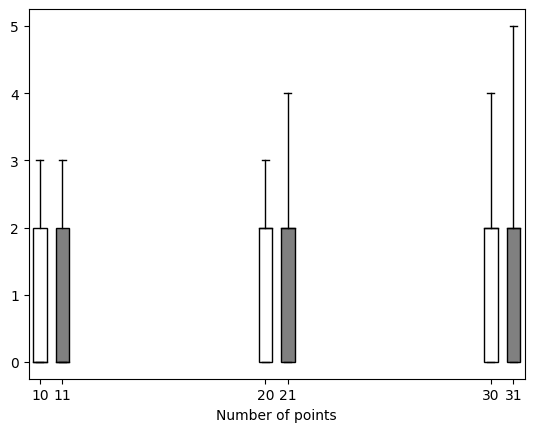

In [13]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = [y[3] for y in out[n]]
    x_minimalize_False = [y[3] for y in out_minimalize_False[n]]
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False)
    bp_minimalize_False = plt.boxplot(x_minimalize_False, vert=True, patch_artist=True, positions=[n + 1], widths=0.6, showfliers=False)
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=1)
    for patch in bp_minimalize_False['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('black')
        for median in bp_minimalize_False['medians']:
            median.set(color='black', linewidth=1)
plt.xlabel('Number of points')
plt.show()

## Random instances in the euclidean plane where the points are drawn at random from a uniform distribution

In this case, run the `ialg` algorithm on bigger instances is much harder. Hence, we will analyze the distribution of the minimum number of SECs for smaller instances.

In [3]:
n_min = 10
n_max = 50 # You can increase this value as you want, but it will take more time
step = 5
n_samples_for_each_n = 100 # This is the value we used in the paper

First, we
analyze
the
empirical
distribution
of
the
minimum
number
of
SECs
needed
to
prove
optimality.We
do
it
trough
boxplots

In [4]:
out = {}
seed = 0
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "uniform_points_in_unit_square")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G) # Here, we do not use verbosity, as the line printed will be too many
        out[n].append((S_family, S_num, partitions, max_comp, runtime))

  0%|          | 0/9 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18


100%|██████████| 9/9 [2:27:18<00:00, 982.05s/it] 


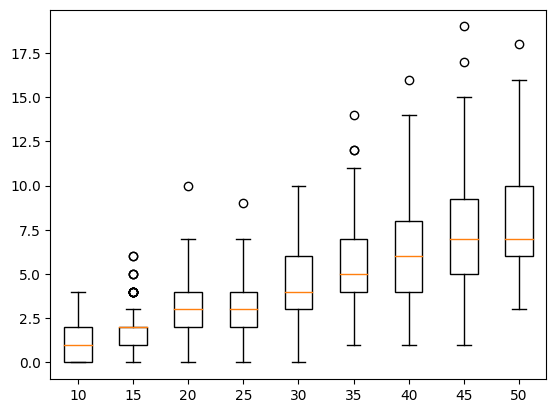

In [6]:
labels = [str(n) for n in range(n_min, n_max + 1, step)]

data = np.zeros((n_samples_for_each_n, len(labels)))

for i, n in enumerate(out.keys()):
    data[:, i] = sorted([y[1] for y in out[n]])

F = open("./output/boxplot_uniform_points_at_random_data.csv", "w+")
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        F.write(f"{data[i, j]},")
    F.write("\n")
F.close()

    
# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels)

    

# draw boxplots
fig, ax = plt.subplots()
bplots = ax.bxp(stats, patch_artist=True, showfliers=True)

# change colors
colors = len(stats) * ['white']
for patch, clr in zip(bplots["boxes"], colors):
    patch.set_facecolor(clr)

plt.show()

### Trend of $c$ vs $c'$

In this part, we want to assess the impact of the flag `minimalize` when setting to either `True` or `False`. 

The previous part of the expriments was done using `minimalize=True`, so the only part left to analyze is `minimalize=False`.

In [7]:
n_min = 10
n_max = 20 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100 # This is the value we used in the paper

In [8]:
seed = 0
out_minimalize_False = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out_minimalize_False[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(seed) # To ensure reproducibility
        seed += 1
        # Sample n points in the unit square
        G = sample(n, "uniform_points_in_unit_square")
        S_family, S_num, partitions, max_comp, runtime, bb_nodes = ialg(G, minimalize=False)
        out_minimalize_False[n].append((S_family, S_num, partitions, max_comp, runtime,bb_nodes))

100%|██████████| 2/2 [00:04<00:00,  2.06s/it]


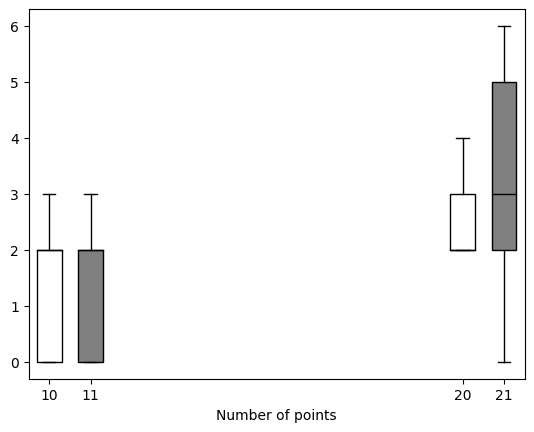

In [9]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = [y[3] for y in out[n]]
    x_minimalize_False = [y[3] for y in out_minimalize_False[n]]
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False)
    bp_minimalize_False = plt.boxplot(x_minimalize_False, vert=True, patch_artist=True, positions=[n + 1], widths=0.6, showfliers=False)
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=1)
    for patch in bp_minimalize_False['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('black')
        for median in bp_minimalize_False['medians']:
            median.set(color='black', linewidth=1)
plt.xlabel('Number of points')
plt.show()